# EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

* PARTE 1: 25 % carga y limpieza
    * Carga con Pandas: pd.read_csv

    * Limpieza de valores error: 
        * hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

    * Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16

    * Limpieza de nulos (limpiar valores NaN):
        * Nulos en columnas continuas: mediana, media
        * Nulos en columnas categóricas: moda, un valor fijo

    * Encoding: texto a numérico
        * Uso de la función get_dummies() para encoding one_hot
        * Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

* PARTE 2: 25 % transformaciones:
    * Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 

    * Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original

    * Crear una nueva columna volumen combinando: x * y * z

    * Ordenar por dos columnas con sort_values():
        * tipo de corte (cut) y precio (price)

    * Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro


# EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

## PARTE 1: 
25 % carga y limpieza


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# todos los necesarios para el ejercicio mientras usemos np y sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle as pkl

### 1.1. Carga con Pandas: pd.read_csv


In [2]:
df = pd.read_csv('../Data/diamonds.csv')

In [3]:
print("Primeras 10 filas del dataset:")
df.head(10)

Primeras 10 filas del dataset:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4,4.05,2.39


In [4]:
print("Información inicial del dataset:")
df.info()

Información inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,y,z
count,53939.000000,53940.000000,53938.000000,53939.000000,53939.000000
mean,0.797946,61.749405,57.457145,5.734479,3.538722
std,0.474013,1.432621,2.234521,1.142092,0.705700
min,0.200000,43.000000,43.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,4.040000
max,5.010000,79.000000,95.000000,58.900000,31.800000


In [6]:
df.shape # 53940 filas y 10 columnas


(53940, 10)

In [7]:
df.keys() # obtenemos los nombres de las columnas

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.empty # nos dice si el dataframe está vacío

False

In [9]:
df.query # nos permite hacer consultas al dataframe

<bound method DataFrame.query of        carat        cut color clarity  depth  table price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [10]:
df.values # nos devuelve los valores del dataframe en forma de array de filas

array([[0.23, 'Ideal', 'E', ..., '3.95', 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., '3.89', 3.84, 2.31],
       [0.23, 'Good', 'E', ..., '4.05', 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., '5.66', 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., '6.15', 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., '5.83', 5.87, 3.64]],
      shape=(53940, 10), dtype=object)

### 1.2. Limpieza de valores error: 


Para trabajar más correctamente con un dataframe, es necesario limpia los datos, es decir, eliminar los valores nulos, duplicados y valores atípicos. Para ello, se pueden utilizar los siguientes métodos:

In [11]:
# Comprobar si hay valores nulos en cada columna (sean '?', 'nan, o no)
print("Número de valores nulos por columna:") 
print(df.isnull().sum()) 

Número de valores nulos por columna:
carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64


#### 1.2.1. sabemos que hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.


In [12]:
# Verificar si hay valores exactamente iguales a '?'
print((df == '?').any().any())


True


In [13]:
# Buscar las filas donde hay valores '?'
rows_with_question_mark = df.isin(['?']).any(axis=1) # Devuelve una Serie con True en las filas que contienen '?'

# Mostrar las filas que contienen '?'
rows_with_question_mark_df = df[rows_with_question_mark] # Filtrar las filas que contienen '?'
print("Filas con valores '?':")
print(rows_with_question_mark_df) # imprime las filas que contienen '?'

Filas con valores '?':
       carat    cut color clarity  depth  table price     x     y     z
49222   0.56  Ideal     ?    VVS2   61.6   56.0  2081     ?  5.29  3.27
49227   0.50      ?     E    VVS2   61.7   61.0  2083  5.09  5.12  3.15
49229   0.70   Good     H     VS2   63.8   60.0     ?  5.59  5.51  3.54


In [14]:
# Buscar las filas donde hay valores texto
def busca_filas_con_texto(df, texto):
    # Identificar las filas que contienen el texto
    rows_with_texto_mark = df.isin([texto]).any(axis=1) # Devuelve una Serie con True en las filas que contienen 'texto'
    rows_with_texto_mark_df = df[rows_with_texto_mark] # Filtrar las filas que contienen 'texto'
    # Obtener los índices de las filas
    indices = rows_with_texto_mark_df.index.tolist()
    
    return rows_with_texto_mark_df, indices

texto = '?' # texto a buscar
filas_con_texto, indices = busca_filas_con_texto(df, texto)

busca_filas_con_texto(df, texto)
print(f"Filas con valores {texto}: ")
print(filas_con_texto) # imprime las filas que contienen 'texto'
print('------------------------------------')
print(f"Índices de las filas con valores '{texto}':")
print(indices)

Filas con valores ?: 
       carat    cut color clarity  depth  table price     x     y     z
49222   0.56  Ideal     ?    VVS2   61.6   56.0  2081     ?  5.29  3.27
49227   0.50      ?     E    VVS2   61.7   61.0  2083  5.09  5.12  3.15
49229   0.70   Good     H     VS2   63.8   60.0     ?  5.59  5.51  3.54
------------------------------------
Índices de las filas con valores '?':
[49222, 49227, 49229]


In [15]:
# Reemplazar valores '?' por NaN
df = df.replace('?', np.nan) 


In [16]:
# Comprobar si hay valores nulos en cada columna
print("Número de valores nulos por columna:")
print(df.isnull().sum()) # Devuelve el número de valores nulos por columna

Número de valores nulos por columna:
carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


Hemos comprobado que aparecen 3 valores nulos en las columnas donde antes había interrogación

In [17]:
# Verificar si hay valores exactamente iguales a '?'
print((df == '?').any().any()) # Devuelve True si hay algún valor igual a '?'


False


con esto ya hemos quitado los interrogantes y los hemos sustituido por nan

### 1.3. Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16


In [18]:
df.info() # información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53936 non-null  object 
 2   color    53937 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53937 non-null  object 
 7   x        53937 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [19]:
# Cambiar el tipo de las columna cut para ver si funciona
df["cut"] = df["cut"].astype("category")
df["x"] = df["x"].astype("float64") # Cambiar a float64 para poder usarlo para calcular el volumen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float64 
 1   cut      53936 non-null  category
 2   color    53937 non-null  object  
 3   clarity  53938 non-null  object  
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  object  
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(1), float64(6), object(3)
memory usage: 3.8+ MB


ya está cambiado el tipo de la columna cut

##### 1.3.1. cambio de tipo de dato de carat , a float16

In [20]:
df["carat"] = df["carat"].astype("float16") # Cambiar a float16 para reducir el uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53939 non-null  float16 
 1   cut      53936 non-null  category
 2   color    53937 non-null  object  
 3   clarity  53938 non-null  object  
 4   depth    53940 non-null  float64 
 5   table    53938 non-null  float64 
 6   price    53937 non-null  object  
 7   x        53937 non-null  float64 
 8   y        53939 non-null  float64 
 9   z        53939 non-null  float64 
dtypes: category(1), float16(1), float64(5), object(3)
memory usage: 3.4+ MB


Ya hemos pasado el tipo de la columna carat de float64 a float 16 para ahorrar memoria

### 1.4. Limpieza de nulos (limpiar valores NaN):


In [21]:
# df['cut'].fillna(df['cut'].mode()[0], inplace=True)

In [22]:
# Comprobar si hay valores nulos en cada columna
print("Número de valores nulos por columna:")
print(df.isnull().sum()) # Devuelve el número de valores nulos por columna

Número de valores nulos por columna:
carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


Vemos que hay nulos en casi todas las columnas, salvo en depth

In [23]:
'''def quita_nan(df):
    for i in df.keys():
        print(i)
        df[i].fillna(df[i].mode()[0], inplace=True)'''
        
        

'def quita_nan(df):\n    for i in df.keys():\n        print(i)\n        df[i].fillna(df[i].mode()[0], inplace=True)'

In [24]:
def quita_nan(df): # Función para reemplazar los NaN por la moda de cada columna
    # Iterar sobre las columnas del DataFrame
    for i in df.keys(): # Iterar sobre las columnas del dataframe
        # Calcular la asimetría (skewness) de la columna
        skewness = stats.skew(df[i].dropna()) # Calcular la asimetría de la columna sin NaN
        print(f'Asimetría de: {i} : {skewness}') # Imprimir la asimetría de la columna i

        # Reemplazar NaN según la asimetría
        if skewness > 1: # Si la asimetría es mayor a 1, reemplazar NaN por la mediana
            df[i].fillna(df[i].median(), inplace=True) # Reemplazar NaN por la mediana
            print(f"Rellenando nulos en {i} con la mediana {df[i].median()}") 

        else: # Si la asimetría es menor o igual a 1, reemplazar NaN por la media
            df[i].fillna(df[i].mean(), inplace=True) # Reemplazar NaN por la media
            print(f"Rellenando nulos en {i} con la media {df[i].mean()}") 


In [31]:
def quita_nan(df):
    # Iterar sobre las columnas del DataFrame
    for i in df.select_dtypes(include=[np.number]).columns:
        # Validar si la columna contiene al menos un valor no nulo
        if df[i].dropna().empty:
            print(f"La columna {i} está completamente vacía. No se puede calcular la asimetría.")
            continue
        
        # Calcular la asimetría (skewness) de la columna sin NaN
        skewness = stats.skew(df[i].dropna())
        print(f"Asimetría de {i}: {skewness}")
        
        # Reemplazar NaN según la asimetría
        if skewness > 1:
            mediana = df[i].median()
            df[i].fillna(mediana, inplace=True)
            print(f"Rellenando nulos en {i} con la mediana: {mediana}")
        else:
            media = df[i].mean()
            df[i].fillna(media, inplace=True)
            print(f"Rellenando nulos en {i} con la media: {media}")
            
            # Aplicar la función quita_nan
print('------------------------------------')
print("Antes de procesar:")
print(df)

quita_nan(df)

# Verificar si quedan valores nulos
print('------------------------------------')
print("\nDespués de procesar:")
print(df)
print('------------------------------------')
print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())
print('------------------------------------')



------------------------------------
Antes de procesar:
          carat        cut color clarity  depth  table price     x     y     z
0      0.229980      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1      0.209961    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2      0.229980       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3      0.290039    Premium     I     VS2   62.4   58.0   334  4.20  4.23  2.63
4      0.310059       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
...         ...        ...   ...     ...    ...    ...   ...   ...   ...   ...
53935  0.720215      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50
53936  0.720215       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61
53937  0.700195  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56
53938  0.859863    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74
53939  0.750000      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\carol\AppData\Local\Temp\ipykernel_1916\2850649708.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mediana, inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_1916\2850649708.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplac

In [32]:
quita_nan(df)
print("Número de valores nulos por columna:")
print(df.isnull().sum())


Asimetría de carat: 1.1171875
Rellenando nulos en carat con la mediana: 0.7001953125
Asimetría de depth: -0.08229173779627727
Rellenando nulos en depth con la media: 61.749404894327036
Asimetría de table: 0.7969311071372762
Rellenando nulos en table con la media: 57.45714524083208
Asimetría de x: 0.37870604022922566
Rellenando nulos en x con la media: 5.731143185568348
Asimetría de y: 2.434355859271755
Rellenando nulos en y con la mediana: 5.71
Asimetría de z: 1.5224537183951334
Rellenando nulos en z con la mediana: 3.53
Número de valores nulos por columna:
carat      0
cut        4
color      3
clarity    2
depth      0
table      0
price      3
x          0
y          0
z          0
dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_1916\2850649708.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mediana, inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_1916\2850649708.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float16 
 1   cut      53936 non-null  category
 2   color    53937 non-null  object  
 3   clarity  53938 non-null  object  
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53937 non-null  object  
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(1), float16(1), float64(5), object(3)
memory usage: 3.4+ MB


In [28]:
df.head(30)

c:\Users\carol\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.229980,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.209961,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.229980,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.290039,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.310059,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.239990,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.239990,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.260010,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.219971,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.229980,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [29]:
'''from scipy import stats
import numpy as np
import pandas as pd

# Crear un DataFrame con valores nulos
data = {
    'carat': [0.23, np.nan, 0.31, 0.45, np.nan],
    'depth': [61.5, 59.8, 56.9, np.nan, 62.4],
    'price': [326, 334, np.nan, 327, 335],
    'cut': ['Ideal', 'Premium', 'Good', np.nan, 'Fair']  # Columna no numérica
}
df = pd.DataFrame(data)

# Función para reemplazar valores nulos
def quita_nan(df):
    for col in df.columns:  # Iterar por todas las columnas
        if df[col].dtype in [np.float64, np.int64]:  # Si la columna es numérica
            if df[col].dropna().empty:  # Evitar columnas completamente vacías
                print(f"La columna {col} está completamente vacía. No se puede calcular la asimetría.")
                continue
            
            # Calcular asimetría
            skewness = stats.skew(df[col].dropna())
            print(f"Asimetría de {col}: {skewness}")
            
            # Rellenar NaN según la asimetría
            if skewness > 1:
                mediana = df[col].median()
                df[col].fillna(mediana, inplace=True)
                print(f"Rellenando nulos en {col} con la mediana: {mediana}")
            else:
                media = df[col].mean()
                df[col].fillna(media, inplace=True)
                print(f"Rellenando nulos en {col} con la media: {media}")
        else:  # Si la columna no es numérica
            if df[col].dropna().empty:
                print(f"La columna {col} está completamente vacía. No se puede calcular la moda.")
                continue
            
            # Rellenar NaN con la moda
            moda = df[col].mode()[0]
            df[col].fillna(moda, inplace=True)
            print(f"Rellenando nulos en {col} con la moda: {moda}")

# Aplicar la función quita_nan
print("Antes de procesar:")
print(df)

quita_nan(df)

print("Después de procesar:")
print(df)'''


'from scipy import stats\nimport numpy as np\nimport pandas as pd\n\n# Crear un DataFrame con valores nulos\ndata = {\n    \'carat\': [0.23, np.nan, 0.31, 0.45, np.nan],\n    \'depth\': [61.5, 59.8, 56.9, np.nan, 62.4],\n    \'price\': [326, 334, np.nan, 327, 335],\n    \'cut\': [\'Ideal\', \'Premium\', \'Good\', np.nan, \'Fair\']  # Columna no numérica\n}\ndf = pd.DataFrame(data)\n\n# Función para reemplazar valores nulos\ndef quita_nan(df):\n    for col in df.columns:  # Iterar por todas las columnas\n        if df[col].dtype in [np.float64, np.int64]:  # Si la columna es numérica\n            if df[col].dropna().empty:  # Evitar columnas completamente vacías\n                print(f"La columna {col} está completamente vacía. No se puede calcular la asimetría.")\n                continue\n            \n            # Calcular asimetría\n            skewness = stats.skew(df[col].dropna())\n            print(f"Asimetría de {col}: {skewness}")\n            \n            # Rellenar NaN se

#### 1.4.1. Nulos en columnas continuas: mediana, media


#### 1.4.2. Nulos en columnas categóricas: moda, un valor fijo


### 1.5. Encoding: texto a numérico


####  1.5.1. Uso de la función get_dummies() para encoding one_hot


#### 1.5.2. Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4


## PARTE 2: 25 % transformaciones:


### 2.1. Crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%). 
        * Ejemplo df['price'] * 1.21 


### 2.2. Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
        * price < 1000 and cut == 'Ideal' entonces 10 % descuento
        * 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
        * si no entra en las condiciones sin descuento, devolver el precio original


### 2.3. Crear una nueva columna volumen combinando: x * y * z


### 2.4. Ordenar por dos columnas con sort_values():


#### 2.4.1. tipo de corte (cut) y precio (price)


### 2.5. Agrupaciones con groupby y visualizarla


#### 2.5.1. Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth


## PARTE 3: 20 % distribuciones: 


### 3.1. Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.


### 3.2. asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.


### 3.3. Discretizar la columna precio por barato, medio, caro usando la función pd.cut


## PARTE 4: 30 % visualizaciones:


### 4.1. Seaborn EDAS:


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

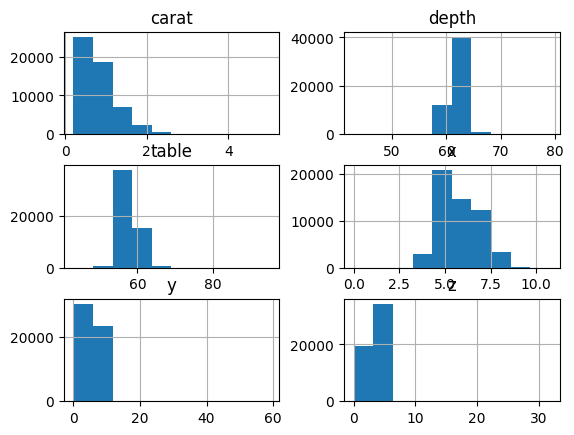

In [30]:
df.hist()

#### 4.1.1. univariantes:


#####  4.1.1.1. histogramas y curvas de densidad


##### 4.1.1.2. boxplot

#####  4.1.1.3. countplot


#### 4.1.2. bivariantes y multivariantes


##### 4.1.2.1. scatterplot con hue, con size, con style


##### 4.1.2.2. Calcular correlación con Pandas y mostrarla con seaborn


##### 4.1.2.3. Hacer la correlación en un gráfico de barras para la columna 'price'


##### 4.1.2.4. Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn


#### 4.1.3. Combinarlas con:


##### 4.1.3.1. hue, style, size, row, col usando un relplot


##### 4.1.3.2. filtro
